In [1]:
import os
import scanpy as sc
from genomemanager.gtf_utils import read_gtf
import pandas as pd
import anndata as ad
import numpy as np
# Imports for the notebook

import sys
sys.path.append("../../")
from digitalhistopathology.datasets.spaceranger_utils import load_spaceranger_coding_genes, aggregate_spots_to_resolution

In [2]:
visium_output_dir = "/storage/research/dbmr_luisierlab/temp/lfournier/Data/Ovarian_Visium_GTOP/hg38/spaceranger/D1_NAB_HUG_03/outs"
path_to_fullres_img = "/storage/research/dbmr_luisierlab/database/Ovarian_Visium_GTOP/Visium_HD/HE_high_res_NAB-HUG-03/NAB-HUG-03_HE_Visium3_Scan1.qptiff"
gtf_path="/storage/research/dbmr_luisierlab/group/genomics/annotation/hg38/GENCODE/gencode.v44.chr_patch_hapl_scaff.annotation.gtf"

adata_002um_coding = load_spaceranger_coding_genes(visium_output_dir, 
                                                   resolution="002um",
                                                   gtf_path=gtf_path, 
                                                   filtered=False)

adata_100um = aggregate_spots_to_resolution(adata=adata_002um_coding, 
                                            current_resolution_um=2, 
                                            target_resolution_um=100)

Loading 002um resolution matrix...


/storage/homefs/lf25x455/.conda/envs/digitalhisto/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/storage/homefs/lf25x455/.conda/envs/digitalhisto/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Loaded 002um matrix:
  Shape: (11222500, 38606) (spots × genes)
  Total UMIs: 17,437,028

Loading GTF annotation from: /storage/research/dbmr_luisierlab/group/genomics/annotation/hg38/GENCODE/gencode.v44.chr_patch_hapl_scaff.annotation.gtf
Found 20280 protein-coding genes in GTF

Checking for duplicate gene names...
  Total genes: 38606
  Unique genes: 38584
  Making gene names unique...
  Done!

Found 19411 coding genes in adata (of 20280 total coding genes)

Final filtered data:
  Shape: (11222500, 19411)
  Total UMIs: 16,987,944


/storage/homefs/lf25x455/.conda/envs/digitalhisto/lib/python3.10/site-packages/anndata/_core/anndata.py:859: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


Added spatial positions to adata.obs
Aggregating from 2um to 100um resolution
Bin size: 50x50 spots

Original number of small spots: 11222500
Number of large spots: 4489
Average small spots per large spot: 2500.00

Distribution of small spots per large spot:
2500    4489
dtype: int64

Expected small spots per large spot: 2500
Threshold (95%): 2375.0
Filtering to keep only large spots with > 2375.0 small spots...
Large spots before filtering: 4489
Large spots after filtering: 4489
Removed 0 large spots
Small spots after filtering: 11222500

Shapes: aggregation matrix shape: (4489, 11222500)
Shapes: expression matrix shape: (11222500, 19411)

Original expression matrix shape: (11222500, 19411)
Aggregated expression matrix shape: (4489, 19411)

Order matches after reordering: True

Aggregated AnnData created:
  Shape: (4489, 19411)
  Total UMIs: 16,987,948
  Mean UMIs per spot: 3784.4
  Mean genes per spot: 1760.1


In [3]:
adata_100um.obs

,pxl_row_in_fullres,pxl_col_in_fullres,large_grid_row,large_grid_col,array_row,array_col,n_genes,total_counts
large_spot_id,,,,,,,,
0_0,31457.720630,27380.639841,0,0,0,0,2275,4211.0
0_1,31056.368784,27383.599271,0,1,0,50,2695,5349.0
0_2,30655.016195,27386.558707,0,2,0,100,2467,4633.0
0_3,30253.662864,27389.518149,0,3,0,150,2867,5382.0
0_4,29852.308790,27392.477596,0,4,0,200,923,1475.0
...,...,...,...,...,...,...,...,...
66_62,6377.071391,1074.282147,66,62,3300,3100,63,65.0
66_63,5975.662241,1077.217495,66,63,3300,3150,62,68.0
66_64,5574.252348,1080.152847,66,64,3300,3200,44,46.0


Loading 002um resolution matrix...


/storage/homefs/lf25x455/.conda/envs/digitalhisto/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/storage/homefs/lf25x455/.conda/envs/digitalhisto/lib/python3.10/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Loaded 002um matrix:
  Shape: (11222500, 38606) (spots × genes)
  Total UMIs: 17,437,028

Loading GTF annotation from: /storage/research/dbmr_luisierlab/group/genomics/annotation/hg38/GENCODE/gencode.v44.chr_patch_hapl_scaff.annotation.gtf
Found 20280 protein-coding genes in GTF

Checking for duplicate gene names...
  Total genes: 38606
  Unique genes: 38584
  Making gene names unique...
  Done!

Found 19411 coding genes in adata (of 20280 total coding genes)

Final filtered data:
  Shape: (11222500, 19411)
  Total UMIs: 16,987,944


/storage/homefs/lf25x455/.conda/envs/digitalhisto/lib/python3.10/site-packages/anndata/_core/anndata.py:859: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


Added spatial positions to adata_coding.obs
Aggregating from 2um to 100um resolution
Bin size: 50x50 spots

Original number of small spots: 11222500
Number of large spots: 4489
Average small spots per large spot: 2500.00

Distribution of small spots per large spot:
2500    4489
dtype: int64
Removing spots where we don't have the expected number of bins...
Shapes: aggregation matrix shape: (4489, 11222500)
Shapes: expression matrix shape: (11222500, 19411)

Original expression matrix shape: (11222500, 19411)
Aggregated expression matrix shape: (4489, 19411)

Order matches after reordering: True

Aggregated AnnData created:
  Shape: (4489, 19411)
  Total UMIs: 16,987,948
  Mean UMIs per spot: 3784.4
  Mean genes per spot: 1760.1
Image dimensions (level 0): (30720, 38880)
Number of levels: 5
Level dimensions: ((30720, 38880), (15360, 19440), (7680, 9720), (3840, 4860), (1920, 2430))
Level downsamples: (1.0, 2.0, 4.0, 8.0, 16.0)
All properties:
tiff.ResolutionUnit: centimeter
tiff.XResolut

/tmp/ipykernel_1698620/2585528333.py:64: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


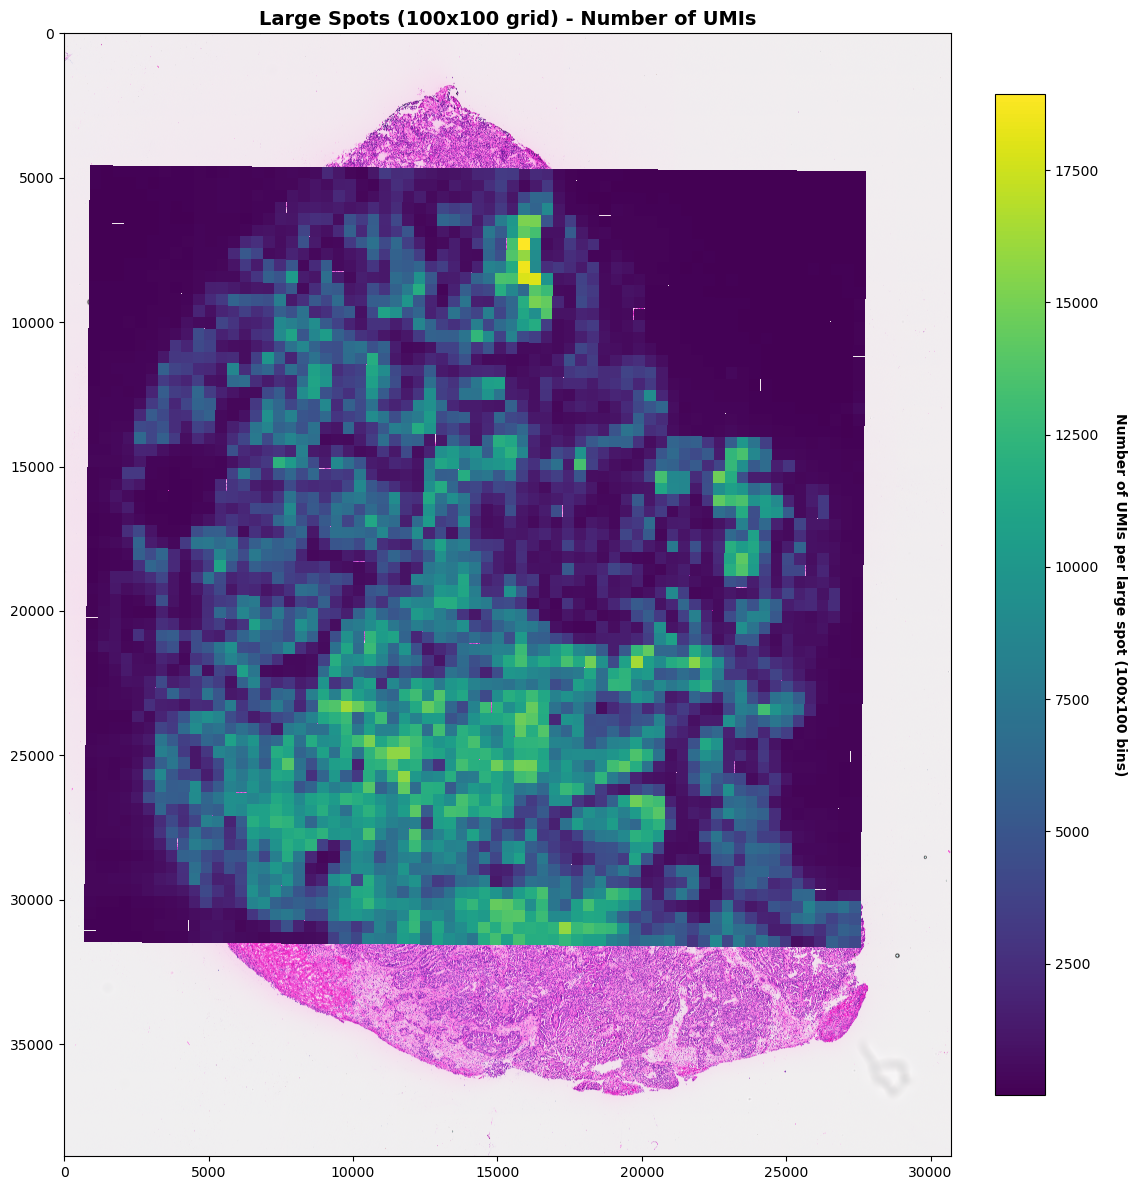


Total large spots plotted: 4489


In [ ]:



import openslide

# Open the whole slide image
slide = openslide.OpenSlide(path_to_fullres_img)

# Get basic properties
print(f"Image dimensions (level 0): {slide.dimensions}")
print(f"Number of levels: {slide.level_count}")
print(f"Level dimensions: {slide.level_dimensions}")
print(f"Level downsamples: {slide.level_downsamples}")

# Get a thumbnail for quick visualization
thumbnail = slide.get_thumbnail(slide.dimensions)



# Get the slide resolution
print("All properties:")
for key in sorted(slide.properties.keys()):
    if 'resolution' in key.lower() or 'mpp' in key.lower():
        print(f"{key}: {slide.properties[key]}")

# Get resolution from TIFF properties
y_resolution = float(slide.properties.get('tiff.YResolution', 0))
x_resolution = float(slide.properties.get('tiff.XResolution', 0))

print(f"\nX Resolution: {x_resolution} pixels/cm")
print(f"Y Resolution: {y_resolution} pixels/cm")

# Convert to microns per pixel
# Resolution is in pixels/cm, so we need: cm/pixel * 10000 microns/cm
microns_per_pixel_x = 10000 / x_resolution if x_resolution > 0 else None
microns_per_pixel_y = 10000 / y_resolution if y_resolution > 0 else None

print(f"\nMicrons per pixel (X): {microns_per_pixel_x:.4f} µm/pixel")
print(f"Microns per pixel (Y): {microns_per_pixel_y:.4f} µm/pixel")

# Visualize the large spots
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

spot_dim = 100 / microns_per_pixel_x


# Get n_genes per large spot
n_genes_large = adata_100um.obs['total_counts'].values

# Create colormap normalization
vmin = n_genes_large.min()
vmax = n_genes_large.max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('viridis')

# Create figure
fig, ax = plt.subplots(figsize=(12, 12))
black_image = np.zeros((thumbnail.size[1], thumbnail.size[0], 3), dtype=np.uint8)
ax.imshow(thumbnail)

# Plot large spots with color representing n_genes
for i, (idx, row) in enumerate(adata_100um.obs.iterrows()):
    x = row['pxl_col_in_fullres']
    y = row['pxl_row_in_fullres']
    color = cmap(norm(n_genes_large[i]))
    rect = plt.Rectangle((x - spot_dim/2, y - spot_dim/2), 
                         spot_dim, spot_dim,  facecolor=color, alpha=1)
    ax.add_patch(rect)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Number of UMIs per large spot (100x100 bins)', rotation=270, labelpad=20, fontweight='bold')

plt.title("Large Spots (100x100 grid) - Number of UMIs", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print(f"\nTotal large spots plotted: {len(adata_100um)}")

In [ ]:
visium_output_dir = "/storage/research/dbmr_luisierlab/temp/lfournier/Data/Ovarian_Visium_GTOP/hg38/spaceranger/A1_NAB_HUG_14/outs"
path_to_fullres_img = "/storage/research/dbmr_luisierlab/database/Ovarian_Visium_GTOP/Visium_HD/HE_high_res_NAB-HUG-14/NAB-HUG-14_HE_Visium3_Scan1.qptiff"

adata_002um_coding = load_spaceranger_coding_genes(visium_output_dir, 
                                                   resolution="002um",
                                                   gtf_path="/storage/research/dbmr_luisierlab/group/genomics/annotation/hg38/GENCODE/gencode.v44.chr_patch_hapl_scaff.annotation.gtf", 
                                                   filtered=False)

adata_100um = aggregate_spots_to_resolution(adata=adata_002um_coding, current_resolution_um=2, target_resolution_um=100)


import openslide

# Open the whole slide image
slide = openslide.OpenSlide(path_to_fullres_img)

# Get basic properties
print(f"Image dimensions (level 0): {slide.dimensions}")
print(f"Number of levels: {slide.level_count}")
print(f"Level dimensions: {slide.level_dimensions}")
print(f"Level downsamples: {slide.level_downsamples}")

# Get a thumbnail for quick visualization
thumbnail = slide.get_thumbnail(slide.dimensions)



# Get the slide resolution
print("All properties:")
for key in sorted(slide.properties.keys()):
    if 'resolution' in key.lower() or 'mpp' in key.lower():
        print(f"{key}: {slide.properties[key]}")

# Get resolution from TIFF properties
y_resolution = float(slide.properties.get('tiff.YResolution', 0))
x_resolution = float(slide.properties.get('tiff.XResolution', 0))

print(f"\nX Resolution: {x_resolution} pixels/cm")
print(f"Y Resolution: {y_resolution} pixels/cm")

# Convert to microns per pixel
# Resolution is in pixels/cm, so we need: cm/pixel * 10000 microns/cm
microns_per_pixel_x = 10000 / x_resolution if x_resolution > 0 else None
microns_per_pixel_y = 10000 / y_resolution if y_resolution > 0 else None

print(f"\nMicrons per pixel (X): {microns_per_pixel_x:.4f} µm/pixel")
print(f"Microns per pixel (Y): {microns_per_pixel_y:.4f} µm/pixel")

# Visualize the large spots
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

spot_dim = 100 / microns_per_pixel_x


# Get n_genes per large spot
n_genes_large = adata_100um.obs['total_counts'].values

# Create colormap normalization
vmin = n_genes_large.min()
vmax = n_genes_large.max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = cm.get_cmap('viridis')

# Create figure
fig, ax = plt.subplots(figsize=(12, 12))
black_image = np.zeros((thumbnail.size[1], thumbnail.size[0], 3), dtype=np.uint8)
ax.imshow(thumbnail)

# Plot large spots with color representing n_genes
for i, (idx, row) in enumerate(adata_100um.obs.iterrows()):
    x = row['pxl_col_in_fullres']
    y = row['pxl_row_in_fullres']
    color = cmap(norm(n_genes_large[i]))
    rect = plt.Rectangle((x - spot_dim/2, y - spot_dim/2), 
                         spot_dim, spot_dim,  facecolor=color, alpha=1)
    ax.add_patch(rect)

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Number of UMIs per large spot (100x100 bins)', rotation=270, labelpad=20, fontweight='bold')

plt.title("Large Spots (100x100 grid) - Number of UMIs", fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print(f"\nTotal large spots plotted: {len(adata_100um)}")


NameError: name 'load_spaceranger_coding_genes' is not defined

Then, filter with the shannon entropy pipeline. 